In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('imdb_dataset.csv')

df

,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0
...,...,...,...,...,...,...,...,...,...,...
3168,The Lord of the Rings: The Return of the King,9.0,2003,PG-13,Action,Peter Jackson,J.R.R. TolkienFran WalshPhilippa Boyens,94.0,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,201.0
3169,Schindler's List,9.0,1993,R,Biography,Steven Spielberg,Liam NeesonRalph FiennesBen Kingsley,95.0,https://m.media-amazon.com/images/M/MV5BNDE4OT...,195.0
3170,The Dark Knight,9.0,2008,PG-13,Action,Christopher Nolan,Jonathan NolanChristopher NolanDavid S. Goyer,84.0,https://m.media-amazon.com/images/M/MV5BMTMxNT...,152.0
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,Mario PuzoFrancis Ford Coppola,100.0,https://m.media-amazon.com/images/M/MV5BM2MyNj...,175.0


In [35]:
# extracting main actors from data (data mining)
df['Main Actor'] = df['Star Cast'].str.extract(r'([A-Z][a-z]+ [A-Z][a-z]+)')

# drop useless columns
df = df.drop(columns=["Poster-src", "Star Cast"])

df = df.drop_duplicates()

df

,Title,IMDb Rating,Year,Certificates,Genre,Director,MetaScore,Duration (minutes),Main Actor
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,45.0,108.0,Louie Leonardo
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,66.0,91.0,Pia Degermark
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,75.0,93.0,Robert Evans
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,79.0,99.0,Andy Andres
4,Mahler,7.0,1974,PG,Biography,Ken Russell,66.0,115.0,Robert Powell
...,...,...,...,...,...,...,...,...,...
3166,The Godfather Part II,9.0,1974,R,Crime,Francis Ford Coppola,90.0,202.0,Francis Ford
3167,12 Angry Men,9.0,1957,Approved,Crime,Sidney Lumet,97.0,96.0,Reginald Rose
3170,The Dark Knight,9.0,2008,PG-13,Action,Christopher Nolan,84.0,152.0,Jonathan Nolan
3171,The Godfather,9.2,1972,R,Crime,Francis Ford Coppola,100.0,175.0,Mario Puzo


In [36]:
print(f"The dataset contains: {len(df)} elements")

The dataset contains: 2762 elements


In [37]:
df.dtypes

Title                  object
IMDb Rating           float64
Year                    int64
Certificates           object
Genre                  object
Director               object
MetaScore             float64
Duration (minutes)    float64
Main Actor             object
dtype: object

In [38]:
df_train = df.drop(columns=["Title"])

df_train

,IMDb Rating,Year,Certificates,Genre,Director,MetaScore,Duration (minutes),Main Actor
0,6.8,2005,PG-13,Adventure,Jim Hanon,45.0,108.0,Louie Leonardo
1,7.0,1967,PG,Biography,Bo Widerberg,66.0,91.0,Pia Degermark
2,7.3,2002,R,Documentary,Nanette Burstein,75.0,93.0,Robert Evans
3,8.2,2022,PG,Documentary,Sean Mullin,79.0,99.0,Andy Andres
4,7.0,1974,PG,Biography,Ken Russell,66.0,115.0,Robert Powell
...,...,...,...,...,...,...,...,...
3166,9.0,1974,R,Crime,Francis Ford Coppola,90.0,202.0,Francis Ford
3167,9.0,1957,Approved,Crime,Sidney Lumet,97.0,96.0,Reginald Rose
3170,9.0,2008,PG-13,Action,Christopher Nolan,84.0,152.0,Jonathan Nolan
3171,9.2,1972,R,Crime,Francis Ford Coppola,100.0,175.0,Mario Puzo


In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['Main Actor'] = le.fit_transform(df_train['Main Actor'])
df_train['Director'] = le.fit_transform(df_train['Director'])
df_train["Certificates"] = le.fit_transform(df_train['Certificates'])
df_train["Genre"] = le.fit_transform(df_train['Genre'])

df_train = df_train[["IMDb Rating", "MetaScore"]]

df_train['Rating Difference'] = df_train['IMDb Rating'] - df_train['MetaScore']

df_train.dtypes

C:\Users\aywski\AppData\Local\Temp\ipykernel_34448\1368692974.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Rating Difference'] = df_train['IMDb Rating'] - df_train['MetaScore']


IMDb Rating          float64
MetaScore            float64
Rating Difference    float64
dtype: object

In [40]:
df_train

,IMDb Rating,MetaScore,Rating Difference
0,6.8,45.0,-38.2
1,7.0,66.0,-59.0
2,7.3,75.0,-67.7
3,8.2,79.0,-70.8
4,7.0,66.0,-59.0
...,...,...,...
3166,9.0,90.0,-81.0
3167,9.0,97.0,-88.0
3170,9.0,84.0,-75.0
3171,9.2,100.0,-90.8


In [41]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=1000, contamination=0.002, random_state=42)
iso_forest.fit(df_train[['Rating Difference']])
anomalies = iso_forest.predict(df_train[['Rating Difference']])

anomaly_data = df_train[anomalies == -1]

df['Anomaly'] = anomalies


In [ ]:
anomalous_movies = df[df['Anomaly'] == -1]

anomalous_movies[['Title', 'IMDb Rating', 'MetaScore']]

,Title,IMDb Rating,MetaScore
74,Modigliani,7.2,25.0
526,Patch Adams,6.8,26.0
785,Joe Dirt,6.0,20.0
1999,Hansel & Gretel: Witch Hunters,6.1,23.0
2008,Maximum Overdrive,5.4,24.0
2336,One Man's Hero,6.0,24.0


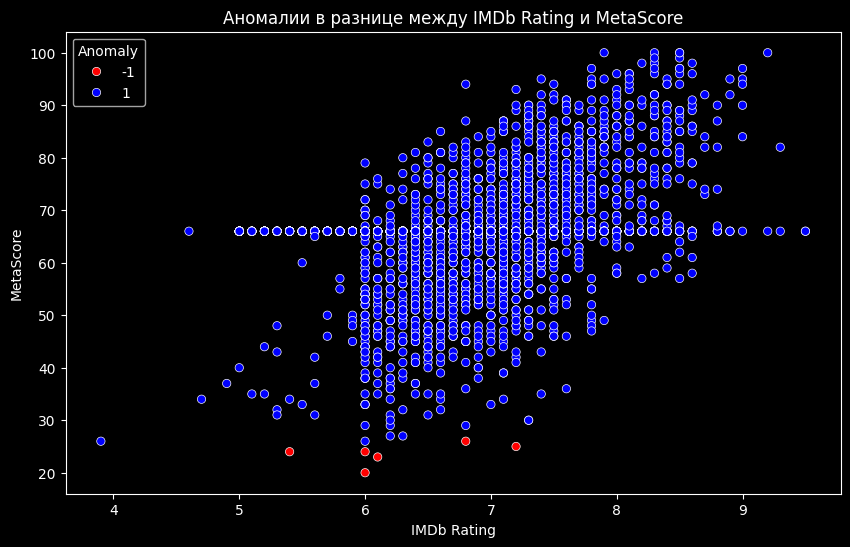

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDb Rating', y='MetaScore', hue='Anomaly', data=df, palette={1: 'blue', -1: 'red'})
plt.title('Anomalies in the difference between IMDb Rating and MetaScore')
plt.xlabel('IMDb Rating')
plt.ylabel('MetaScore')
plt.show()